In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, img_as_float
import matplotlib.image as mpimg

In [6]:

# -----------------------
# Step 2: Threshold-based segmentation
# -----------------------
def otsu_threshold(image):
    """
    Menghitung nilai threshold Otsu secara manual dari citra grayscale.
    """
    # Pastikan nilai intensitas 0–255
    hist, bins = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total = image.size

    current_max, threshold = 0, 0
    sum_total = np.dot(np.arange(256), hist)
    sum_background, weight_background = 0, 0

    for i in range(256):
        weight_background += hist[i]
        if weight_background == 0:
            continue
        weight_foreground = total - weight_background
        if weight_foreground == 0:
            break

        sum_background += i * hist[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Variansi antar kelas
        between_var = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        if between_var > current_max:
            current_max = between_var
            threshold = i

    return threshold


def threshold_segmentation(image):
    """
    Segmentasi berdasarkan Otsu Threshold.
    """
    threshold = otsu_threshold(image)
    segmented = np.zeros_like(image)
    segmented[image >= threshold] = 1
    return segmented

# -----------------------
# Step 3: Morphological operations (manual)
# -----------------------
def pad_image(image, pad):
    return np.pad(image, pad, mode='constant', constant_values=0)

def erosion(binary_image, kernel):
    kx, ky = kernel.shape
    pad = kx // 2
    padded = pad_image(binary_image, pad)
    result = np.zeros_like(binary_image)

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            region = padded[i:i+kx, j:j+ky]
            # Erosi hanya jika semua posisi '1' di kernel cocok dengan '1' di region
            result[i, j] = 1 if np.all(region[kernel == 1] == 1) else 0
    return result

def dilation(binary_image, kernel):
    kx, ky = kernel.shape
    pad = kx // 2
    padded = pad_image(binary_image, pad)
    result = np.zeros_like(binary_image)

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            region = padded[i:i+kx, j:j+ky]
            # Dilasi jika ada satu posisi '1' di kernel yang cocok dengan '1' di region
            result[i, j] = 1 if np.any(region[kernel == 1] == 1) else 0
    return result

def opening(binary_image, kernel):
    return dilation(erosion(binary_image, kernel), kernel)

def closing(binary_image, kernel):
    return erosion(dilation(binary_image, kernel), kernel)


In [25]:

# Load image
img_color = mpimg.imread('gambar.jpg')

# Convert to grayscale manually
if img_color.ndim == 3:
    img = np.dot(img_color[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img = img_color

# Normalize grayscale image to 0–255
img = (img * 255 / img.max()).astype(np.uint8) 


# Threshold segmentation
segmented = threshold_segmentation(img)

# Kernel horizontal manual
kernel = np.array([
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]
], dtype=np.uint8)

dilatated = dilation(segmented, kernel)
eroted = erosion(segmented, kernel)

# Morphological processing
opened = opening(segmented, kernel)
closed = closing(segmented, kernel)

# Kernel vertical manual
kernel_v = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0]
], dtype=np.uint8)

dilatated_v = dilation(segmented, kernel_v)
eroted_v = erosion(segmented, kernel_v)

# Morphological processing
opened_v = opening(segmented, kernel_v)
closed_v = closing(segmented, kernel_v)

# Kernel vertical manual
kernel_x = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
], dtype=np.uint8)

dilatated_x = dilation(segmented, kernel_x)
eroted_x = erosion(segmented, kernel_x)

# Morphological processing
opened_x = opening(segmented, kernel_x)
closed_x = closing(segmented, kernel_x)


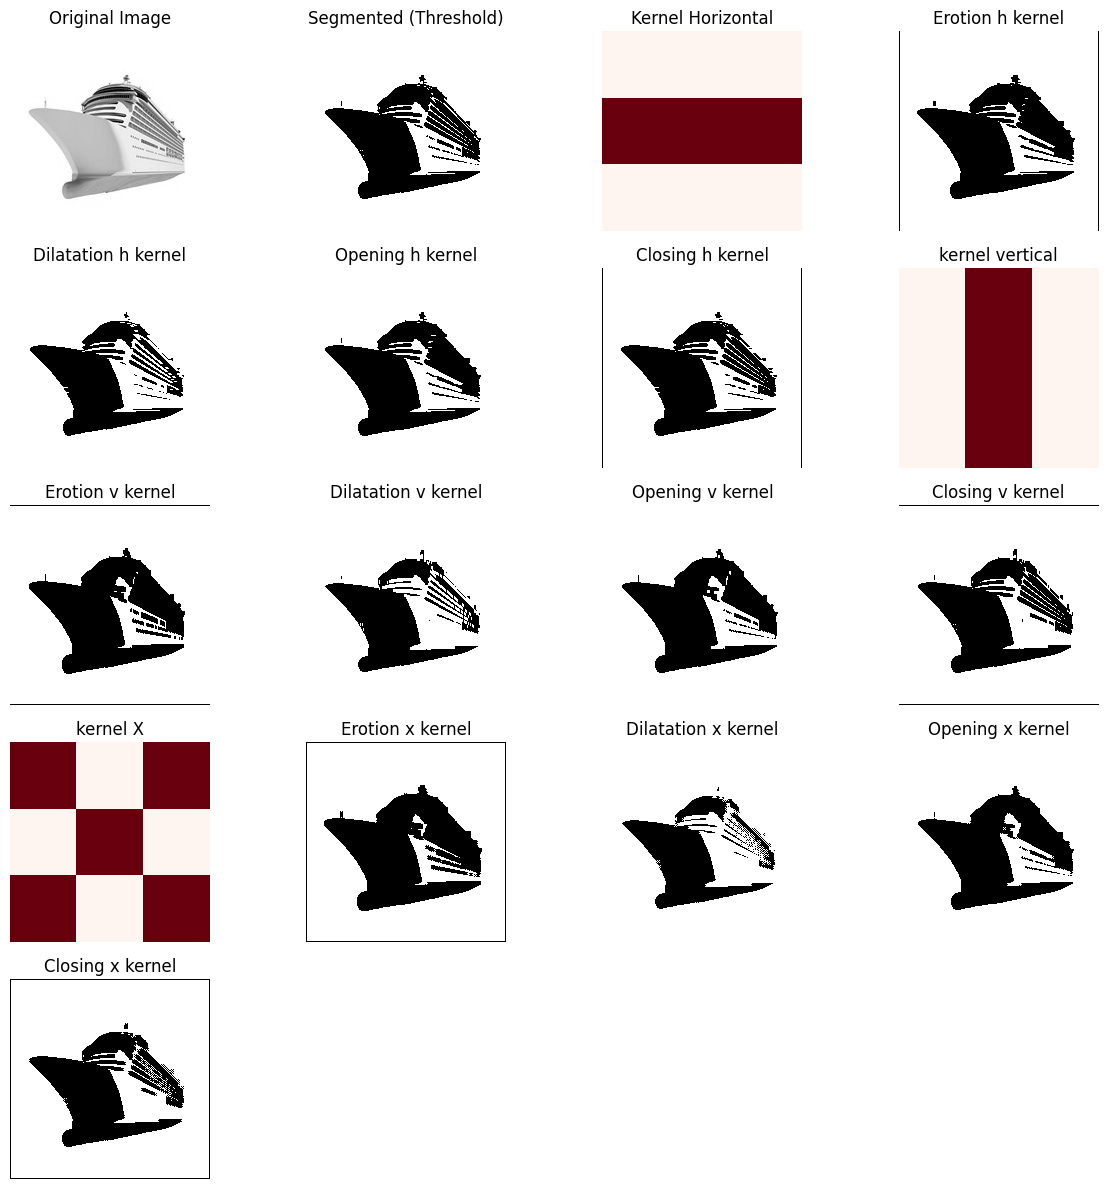

In [26]:
# -----------------------
# Step 5: Plot results
# -----------------------
plt.figure(figsize=(12, 12))

plt.subplot(5, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(5, 4, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented (Threshold)")
plt.axis('off')

plt.subplot(5, 4, 3)
plt.imshow(kernel, cmap='Reds')
plt.title("Kernel Horizontal")
plt.axis('off')

plt.subplot(5, 4, 4)
plt.imshow(eroted, cmap='gray')
plt.title("Erotion h kernel")
plt.axis('off')

plt.subplot(5, 4, 5)
plt.imshow(dilatated, cmap='gray')
plt.title("Dilatation h kernel")
plt.axis('off')

plt.subplot(5, 4, 6)
plt.imshow(opened, cmap='gray')
plt.title("Opening h kernel")
plt.axis('off')

plt.subplot(5, 4, 7)
plt.imshow(closed, cmap='gray')
plt.title("Closing h kernel")
plt.axis('off')

plt.subplot(5, 4, 8)
plt.imshow(kernel_v, cmap='Reds')
plt.title("kernel vertical")
plt.axis('off')

plt.subplot(5, 4, 9)
plt.imshow(eroted_v, cmap='gray')
plt.title("Erotion v kernel")
plt.axis('off')

plt.subplot(5, 4, 10)
plt.imshow(dilatated_v, cmap='gray')
plt.title("Dilatation v kernel")
plt.axis('off')

plt.subplot(5, 4, 11)
plt.imshow(opened_v, cmap='gray')
plt.title("Opening v kernel")
plt.axis('off')

plt.subplot(5, 4, 12)
plt.imshow(closed_v, cmap='gray')
plt.title("Closing v kernel")
plt.axis('off')

plt.subplot(5, 4, 13)
plt.imshow(kernel_x, cmap='Reds')
plt.title("kernel X")
plt.axis('off')

plt.subplot(5, 4, 14)
plt.imshow(eroted_x, cmap='gray')
plt.title("Erotion x kernel")
plt.axis('off')

plt.subplot(5, 4, 15)
plt.imshow(dilatated_x, cmap='gray')
plt.title("Dilatation x kernel")
plt.axis('off')

plt.subplot(5, 4, 16)
plt.imshow(opened_x, cmap='gray')
plt.title("Opening x kernel")
plt.axis('off')

plt.subplot(5, 4, 17)
plt.imshow(closed_x, cmap='gray')
plt.title("Closing x kernel")
plt.axis('off')

plt.tight_layout()
plt.show()